# **Laboratorio: Regresión Lineal**

## **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación que define la relación entre las variables del vector $x$ y una variable de salida $y$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $w$. La estimación de los parámetros de la ecuación $w$ usualmente se hace usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamento es fundamental en inteligencia artificial.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:
\begin{align*}
  y = g(x; w)=w_{0} + w_1 x,\\
 \end{align*}
donde los $w_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $w$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};w)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{w\in\mathbb{R}^n} f(w)=\left | \left|  y^{(j)}-g\left (x^{(j)};w \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión.

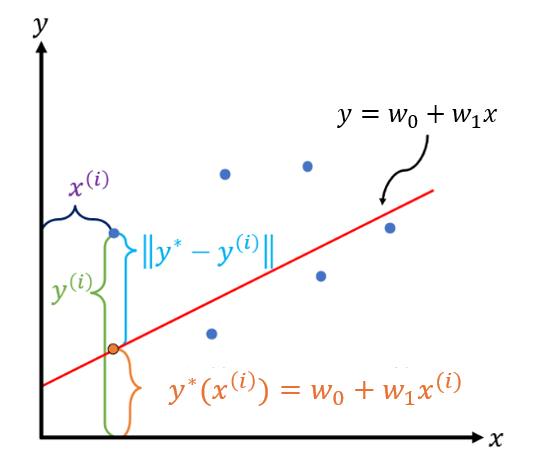

Aquí, $w = [w_0, w_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:
\begin{align*}
  \min_{w\in\mathbb{R}^n}    f(w)=\left | \left| y^{(j)}-\left ( w_{0} + w_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $w_{0} + w_1 x^{(j)}$, se puede escribir vectorialmente como:

\begin{align*}
  w_{0} + w_1 x^{(j)} = [1, x^{(j)}] w.
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:

\begin{align*}
   \begin{bmatrix}
      w_{0} + w_1 x^{(1)}\\
      w_{0} + w_1 x^{(2)}\\
      \vdots\\
      w_{0} + w_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    w_0\\
    w_1
   \end{bmatrix}.
\end{align*}

La matriz que acompaña a $w$ se nombrará $H$. El problema de optimización se reescribe entonces como :
 \begin{align*}
   \min_{w\in\mathbb{R}^n}f(w)=||y-Hw||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.



## **Ejemplo:**

En este ejemplo demostraremos como se puede dar solución al problema de optimización mediante el método de descenso de gradiente.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(354)

En primer lugar, vamos a generar un set de tuplas $(x,y)$ de forma artificial para verificar el funcionamiento de un método de búsqueda. En este caso, generamos observaciones ruidosas que vienen de la recta: $y=1+2w$. Es decir, sabemos de entrada que el modelo real $w$ es $[1,2]^T$.

In [52]:
data_x = np.linspace(0,1,100)
data_y = 2*data_x + 1
data_y = data_y + np.random.randn(len(data_y))/5  # Contaminar observaciones con ruido aleatorio

A continuación, vamos a graficar los datos generados:

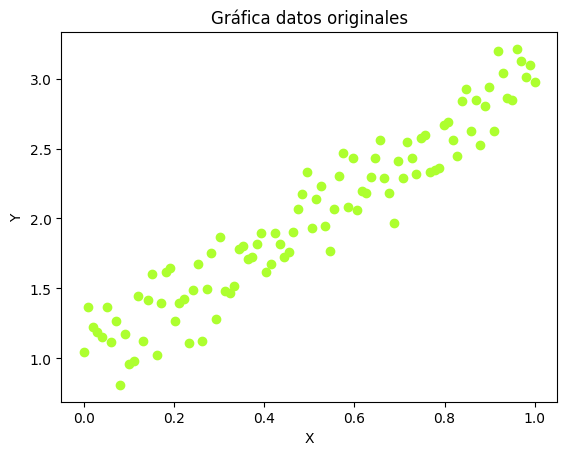

In [53]:
#Se grafican los datos
plt.scatter(data_x,data_y,color="greenyellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfica datos originales")
plt.show()

Ahora bien, se sabe que el gradiente de la función a minimizar es: $∇f(w)=-2H^Ty+2H^THw$. Por lo que, primero es necesario definir una función que construya la matriz $H$ asociada a la regresión.

In [54]:
def matriz_H(N,data):
  H = np.zeros((len(data),N+1))
  for i in range(N+1):
    H[:,i] = data**i
  return H

Por otro lado se se definen la función objetivo y su gradiente:

In [55]:
# Función
def funcion_obj(w,H,y):
  return (np.linalg.norm(y - H@w))**2

#Gradiente de la función
def gradiente(w,H,y):
  return -2*np.transpose(H)@y+ 2*np.transpose(H)@H@w

Adicionalmente, se utiliza el algoritmo de descenso de gradiente que recibe parámetros como la condición inicial, el paso de descenso $\alpha$, la toleracia de la condicón de parada, la matriz $H$ y el vector $y$.

In [56]:
def desc_grad(w0,alpha,n,epsilon,H,y):
  hist = [w0]
  hist_fun = [funcion_obj(w0,H,y)]
  converge = False
  k = 0
  while k<=n:
    w_n = hist[k] - alpha*gradiente(hist[k],H,y)
    hist.append(w_n)
    hist_fun.append(funcion_obj(w_n,H,y))
    if np.linalg.norm(hist[k+1] - hist[k]) <= epsilon:
      converge=True
      break
    k+=1
  return hist,hist_fun,converge


Ya con todas las funciones necesarias para darle solución al problema se establecen los valores de los parámetros y se evaluan la función del descenso de gradiente en los mismos.

In [57]:
w0=np.array([2,3])
n=10000
epsilon=0.0001
H=matriz_H(1,data_x)
algoritmo=desc_grad(w0,0.001,n,epsilon,H,data_y)
algoritmo[0][-1]

array([0.99827974, 2.01456047])

#**Gráfica**

En esta parte graficaremos, por un lado, la trayectoria recorrida por el descenso de gradiente (gráfica de la izquierda) y la recta que resulta de encontrar $w^*=[w_0^*,w_1^*]$ mediante el método de descenso de gradiente (gráfica de la derecha).

In [58]:
array_x = np.linspace(-1,3)
array_y = np.linspace(0,5)

X,Y = np.meshgrid(array_x,array_y)

F = []
for i in array_x:
  for j in array_y:
    F.append(funcion_obj([i,j],H,data_y))
F = np.array(F).reshape(X.shape)

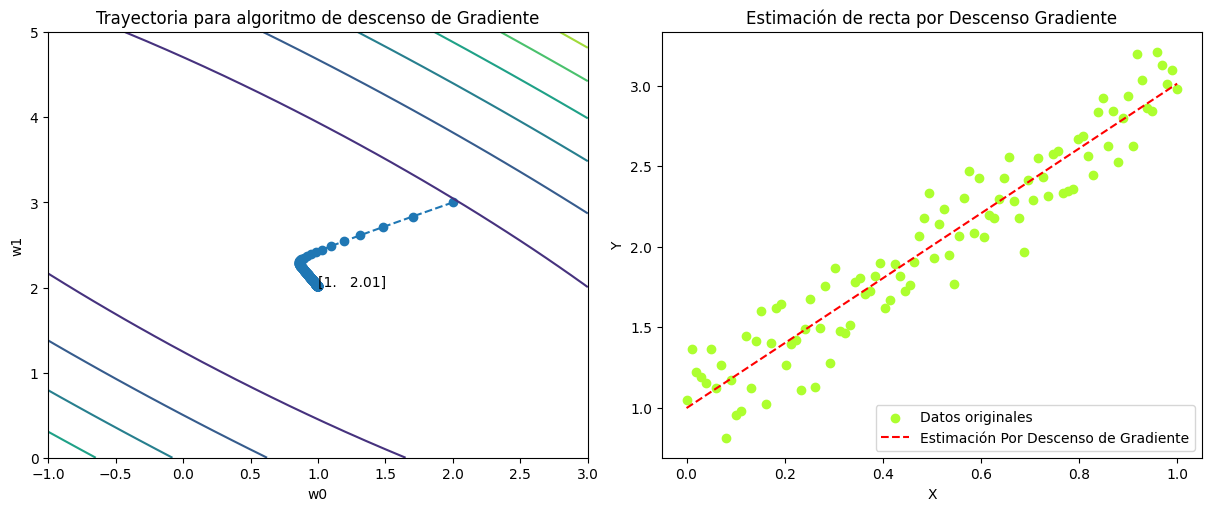

In [59]:
#Grafica de la trayectoria
fig, ax = plt.subplots(1,2,figsize=(12,5),layout="constrained")
ax[0].plot([i[0] for i in algoritmo[0]],[i[1] for i in algoritmo[0]],'o--')
ax[0].contour(X,Y,F)
ax[0].text(algoritmo[0][-1][0],algoritmo[0][-1][1],f"{np.round(algoritmo[0][-1],2)}")
ax[0].set(title="Trayectoria para algoritmo de descenso de Gradiente",xlabel="w0",ylabel="w1")

#Regresión lineal
recta= algoritmo[0][-1][1]*data_x+algoritmo[0][-1][0]
ax[1].scatter(data_x,data_y,color="greenyellow",label="Datos originales")
ax[1].plot(data_x,recta,"--r",label="Estimación Por Descenso de Gradiente")
ax[1].set(title="Estimación de recta por Descenso Gradiente",xlabel="X",ylabel="Y")
ax[1].legend(loc='lower right')
plt.show()

Por último, observaremos los primeros 15 pasos de la trayectoria:

In [60]:
for i,j in algoritmo[0][:15]:
  print(f"({round(i,2)},{round(j,2)})")

(2,3)
(1.7,2.83)
(1.48,2.71)
(1.31,2.61)
(1.19,2.54)
(1.1,2.49)
(1.03,2.45)
(0.98,2.41)
(0.95,2.39)
(0.92,2.37)
(0.9,2.35)
(0.89,2.34)
(0.88,2.33)
(0.87,2.32)
(0.86,2.31)


Así, observamos que el algoritmo de descenso de gradiente logra identificar los parámetros que planteamos inicialmente para la recta ($w = [1,2]^T$).

## **Comparación con la solución analítica:**

**Vamos a comparar los resultados obtenidos con el algoritmo de descenso de gradiente vs. la solución analítica que hallaremos a continuación (Método de mínimos cuadrados.)**

 Este problema de optimización tiene una solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Obteniendo esta solución:
\begin{align*}
  w^* =  (H^TH)^{-1}H^Ty .
 \end{align*}



Teniendo en cuenta lo anterior, vamos a definir la función de la solución: $w^*=(H^T H)^{-1} H^T y$ utilizando la matriz $H$ que ya tenemos.

In [61]:
def solucion(H,data_y):
  return np.linalg.inv(H.T@H)@H.T@data_y

Y graficamos la solución obtenida junto con los datos originales.

[1.00173006 2.00812251]


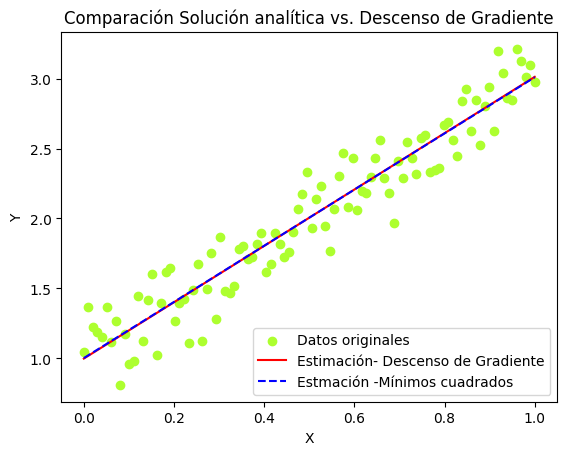

In [62]:
H_t1 = matriz_H(1,data_x)
w_t1 = solucion(H_t1,data_y)
print(w_t1)

plt.scatter(data_x,data_y,color="greenyellow",label="Datos originales")
plt.title("Comparación Solución analítica vs. Descenso de Gradiente")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(data_x,recta,"r",label="Estimación- Descenso de Gradiente")
plt.plot(data_x,H_t1@w_t1,"--b",label="Estmación -Mínimos cuadrados")

plt.legend(loc='lower right')

Podemos evidenciar que logramos llegar a la misma solución para la regresión lineal utilizando dos métodos distintos (Descenso de gradiente y Solución analítica)

## **Ejercicios:**

**1. Modifique el código de descenso de gradiente para graficar su trayectoria y regresion con un alpha de 0.0001. En caso de que no se genere ninguna gráfica explique a que se puede deber esto.  PISTA: Puede revisar los resultados que arroja el algoritmo de descenso de gradiente**


**2. Modifique el código de descenso de gradiente para graficar su trayectoria y regresion con un alpha de 0.000001**

**3. Teniendo en cuenta los resultados obtenidos en los puntos anteriores. ¿Que efecto se puede decir que tiene el alpha sobre el algoritmo?**